## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import IPython
import numpy as np
import wave
from sklearn.cluster import KMeans
import os
from PIL import Image
from numpy import asarray
import cv2
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,AveragePooling2D,GlobalMaxPooling2D,MaxPool2D,UpSampling2D,concatenate,Dropout
from sklearn.metrics import *
from matplotlib import pyplot
from tensorflow.keras.optimizers import Adam
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)


2.12.0


## Load and preprocess images


In [ ]:
base_train_path = "/content/drive/MyDrive/Embedded Project/dataset/"
base_pal_images_path = "/content/drive/MyDrive/Embedded Project/dataset/01_palm/"
base_L_images_path = "/content/drive/MyDrive/Embedded Project/dataset/02_l/"
base_fist_images_path = "/content/drive/MyDrive/Embedded Project/dataset/03_fist/"

In [ ]:
base_fist_moved_images_path = "/content/drive/MyDrive/Embedded Project/dataset/04_fist_moved/"


In [ ]:
base_thumb_images_path = "/content/drive/MyDrive/Embedded Project/dataset/05_thumb/"


In [ ]:
base_index_images_path = "/content/drive/MyDrive/Embedded Project/dataset/06_index/"


In [ ]:
base_ok_images_path = "/content/drive/MyDrive/Embedded Project/dataset/07_ok/"


In [ ]:
base_palm_moved_images_path = "/content/drive/MyDrive/Embedded Project/dataset/08_palm_moved/"


In [ ]:
base_c_images_path = "/content/drive/MyDrive/Embedded Project/dataset/09_c/"


In [ ]:
base_down_images_path = "/content/drive/MyDrive/Embedded Project/dataset/10_down/"


In [ ]:
fist_images = len(list(os.listdir(base_fist_images_path)))
print("Number of fist images: ", fist_images)

Number of fist images:  267


Text(0.5, 1.0, 'Down')

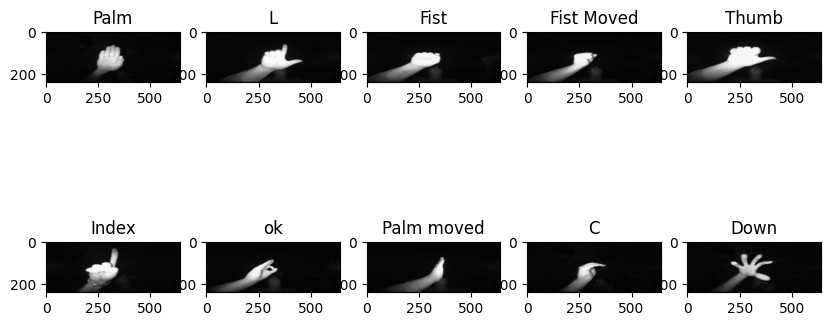

In [ ]:
fig = plt.figure(figsize=(10,5))
rows = 2
columns = 5

palm_image=list(os.listdir(base_pal_images_path))
img1 = cv2.imread(base_pal_images_path+palm_image[0])
fig.add_subplot(rows, columns, 1)
plt.imshow(img1)
plt.title("Palm")

I_image=list(os.listdir(base_L_images_path))
img2 = cv2.imread(base_L_images_path+I_image[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(img2)
plt.title("L")


fist_image=list(os.listdir(base_fist_images_path))
img3 = cv2.imread(base_fist_images_path+fist_image[0])
fig.add_subplot(rows, columns, 3)
plt.imshow(img3)
plt.title("Fist")

fist_moved_image=list(os.listdir(base_fist_moved_images_path))
img3 = cv2.imread(base_fist_moved_images_path+fist_moved_image[0])
fig.add_subplot(rows, columns, 4)
plt.imshow(img3)
plt.title("Fist Moved")

thumb_image=list(os.listdir(base_thumb_images_path))
img3 = cv2.imread(base_thumb_images_path+thumb_image[0])
fig.add_subplot(rows, columns, 5)
plt.imshow(img3)
plt.title("Thumb")

index_image=list(os.listdir(base_index_images_path))
img3 = cv2.imread(base_index_images_path+index_image[0])
fig.add_subplot(rows, columns, 6)
plt.imshow(img3)
plt.title("Index")

ok_image=list(os.listdir(base_ok_images_path))
img3 = cv2.imread(base_ok_images_path+ok_image[0])
fig.add_subplot(rows, columns, 7)
plt.imshow(img3)
plt.title("ok")

palm_moved_image=list(os.listdir(base_palm_moved_images_path))
img3 = cv2.imread(base_palm_moved_images_path+palm_moved_image[0])
fig.add_subplot(rows, columns, 8)
plt.imshow(img3)
plt.title("Palm moved")

C_image=list(os.listdir(base_c_images_path))
img3 = cv2.imread(base_c_images_path+C_image[0])
fig.add_subplot(rows, columns, 9)
plt.imshow(img3)
plt.title("C")

down_image=list(os.listdir(base_down_images_path))
img3 = cv2.imread(base_down_images_path+down_image[0])
fig.add_subplot(rows, columns, 10)
plt.imshow(img3)
plt.title("Down")


## Create Dataset

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_train_path,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 10 classes.
Using 1800 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_train_path,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 10 classes.
Using 450 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [ ]:
train_ds_normal = tf.keras.utils.image_dataset_from_directory(
  base_train_path,
  validation_split=0.2,
  subset="training",
  color_mode="rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 10 classes.
Using 1800 files for training.


In [ ]:
val_ds_normal = tf.keras.utils.image_dataset_from_directory(
  base_train_path,
  validation_split=0.2,
  subset="validation",
  color_mode="rgb",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 10 classes.
Using 450 files for validation.


## Data Visualisation

Text(0.5, 1.0, 'Count of Image')

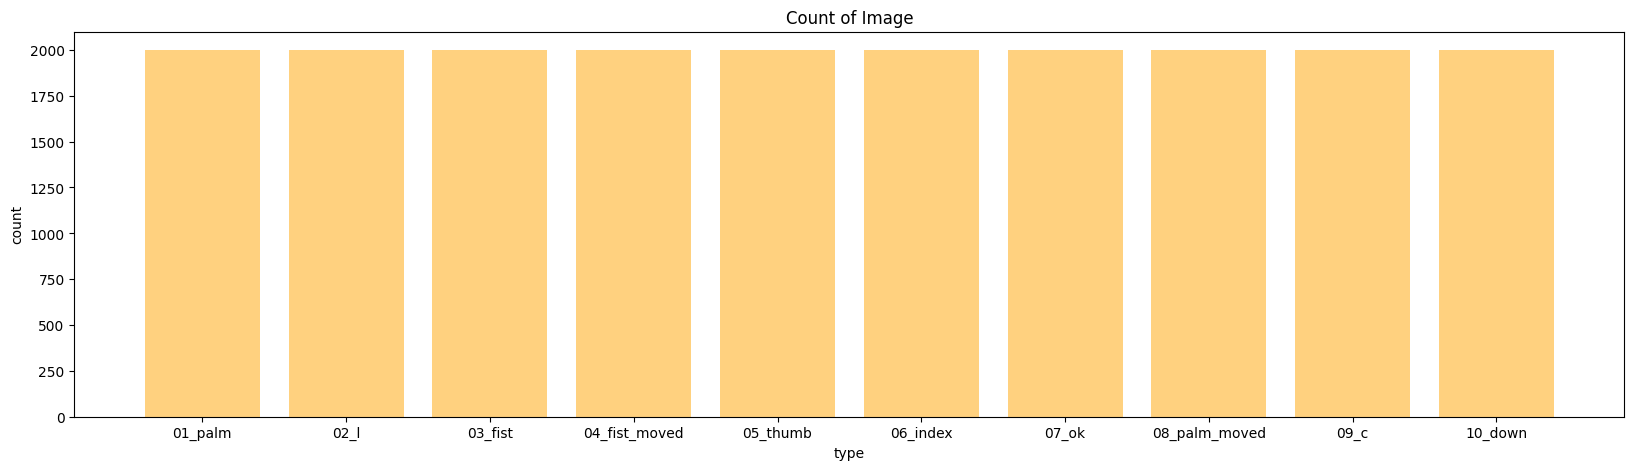

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(class_names,[2000 for i in range(10)],color='orange',alpha=0.5)
plt.xlabel('type')
plt.ylabel('count')
plt.title('Count of Image')

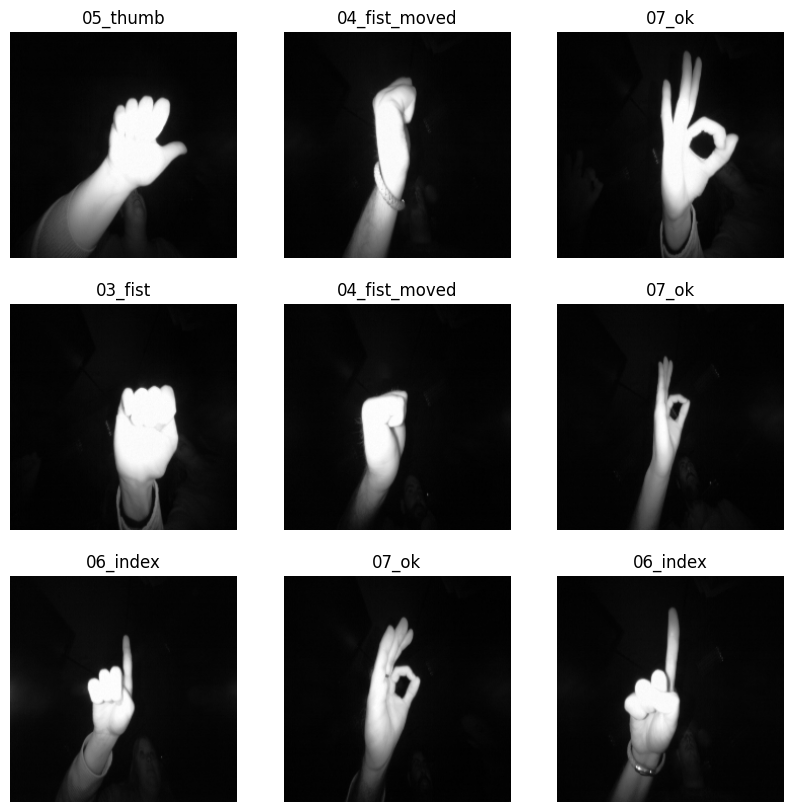

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().flatten().reshape(224,224).astype("uint8"),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Deep Learning Model - CNN

### AutoEncoding Model

In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(512, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
57/57 [==============================] - 14s 153ms/step - loss: 4.1712 - accuracy: 0.4239 - val_loss: 0.3716 - val_accuracy: 0.8778
Epoch 2/20
57/57 [==============================] - 7s 115ms/step - loss: 0.1541 - accuracy: 0.9544 - val_loss: 0.0797 - val_accuracy: 0.9733
Epoch 3/20
57/57 [==============================] - 11s 167ms/step - loss: 0.0449 - accuracy: 0.9850 - val_loss: 0.3054 - val_accuracy: 0.9111
Epoch 4/20
57/57 [==============================] - 10s 168ms/step - loss: 0.1560 - accuracy: 0.9467 - val_loss: 0.1958 - val_accuracy: 0.9489
Epoch 5/20
57/57 [==============================] - 10s 150ms/step - loss: 0.0427 - accuracy: 0.9900 - val_loss: 0.0172 - val_accuracy: 0.9978
Epoch 6/20
57/57 [==============================] - 7s 104ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/20
57/57 [==============================] - 8s 139ms/step - loss: 8.7931e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.000

In [ ]:
hist_autoenc = pd.DataFrame(history.history)
hist_autoenc['epoch'] = history.epoch
hist_autoenc.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.000026,1.0,0.000481,1.0,15
16,0.000022,1.0,0.000487,1.0,16
17,0.000020,1.0,0.000461,1.0,17
18,0.000018,1.0,0.000439,1.0,18
19,0.000016,1.0,0.000420,1.0,19


Text(0.5, 1.0, 'Training accuracy variation with epochs')

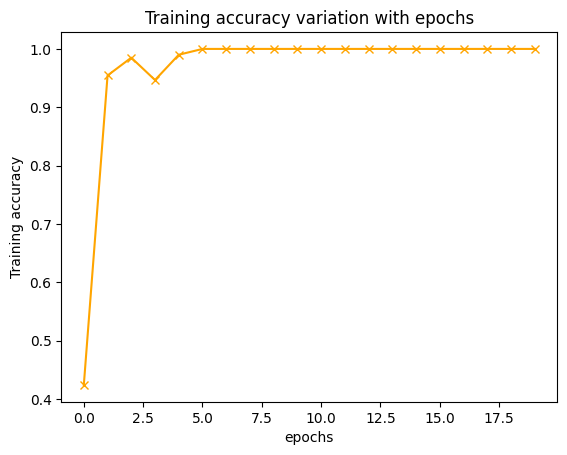

In [ ]:
plt.plot(hist_autoenc['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

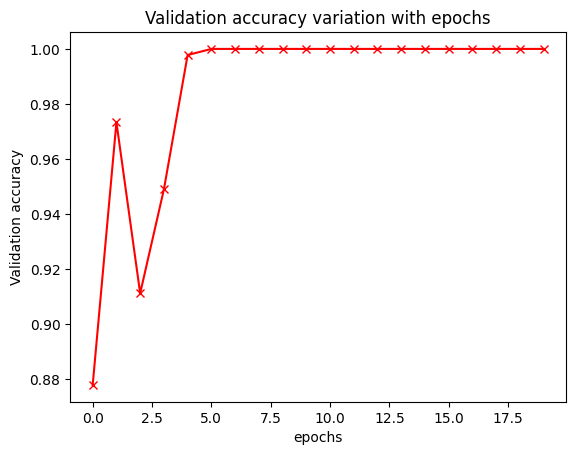

In [ ]:
plt.plot(hist_autoenc['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

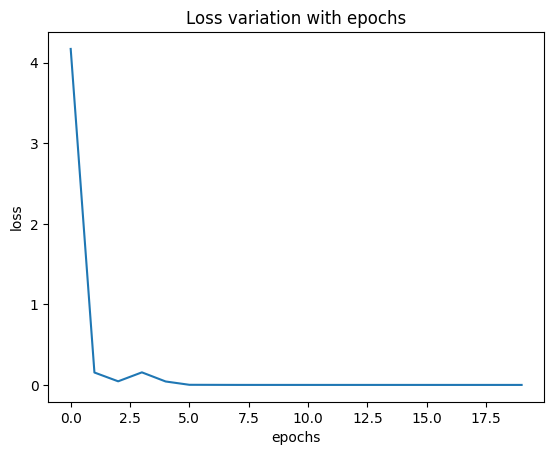

In [ ]:
plt.plot(hist_autoenc['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

### VGG-19


In [ ]:
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(224,224,1)))
model.add(MaxPooling2D())
model.add(Conv2D(128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(512, kernel_size=3, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 26, 26, 256)     

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
57/57 [==============================] - 12s 150ms/step - loss: 2.9154 - accuracy: 0.6522 - val_loss: 0.2602 - val_accuracy: 0.9000
Epoch 2/15
57/57 [==============================] - 10s 160ms/step - loss: 0.1114 - accuracy: 0.9656 - val_loss: 0.1023 - val_accuracy: 0.9689
Epoch 3/15
57/57 [==============================] - 9s 148ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.1266 - val_accuracy: 0.9578
Epoch 4/15
57/57 [==============================] - 8s 126ms/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 0.3589 - val_accuracy: 0.8933
Epoch 5/15
57/57 [==============================] - 9s 140ms/step - loss: 0.0640 - accuracy: 0.9856 - val_loss: 0.0358 - val_accuracy: 0.9889
Epoch 6/15
57/57 [==============================] - 8s 137ms/step - loss: 0.0852 - accuracy: 0.9778 - val_loss: 0.0741 - val_accuracy: 0.9711
Epoch 7/15
57/57 [==============================] - 8s 129ms/step - loss: 0.0128 - accuracy: 0.9950 - val_loss: 0.0456 - val_accuracy: 0.9911
Epoc

In [ ]:
hist_vgg19 = pd.DataFrame(history.history)
hist_vgg19['epoch'] = history.epoch
hist_vgg19.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
10,0.000047,1.0,0.026039,0.993333,10
11,0.000038,1.0,0.025551,0.993333,11
12,0.000032,1.0,0.025200,0.995556,12
13,0.000027,1.0,0.024835,0.995556,13
14,0.000023,1.0,0.024584,0.995556,14


Text(0.5, 1.0, 'Training accuracy variation with epochs')

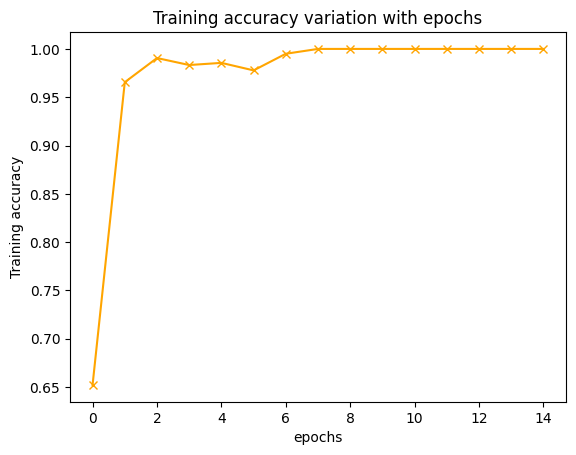

In [ ]:
plt.plot(hist_vgg19['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

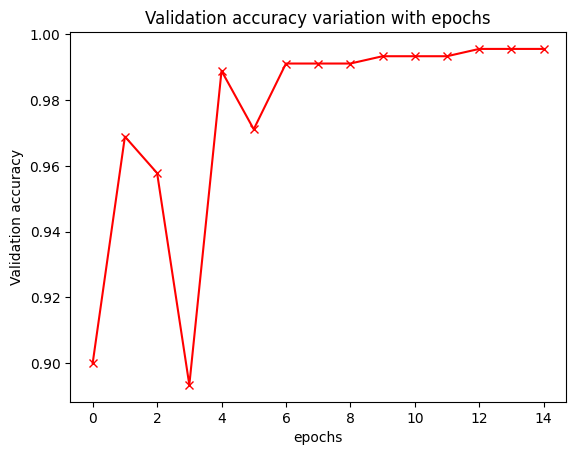

In [ ]:
plt.plot(hist_vgg19['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

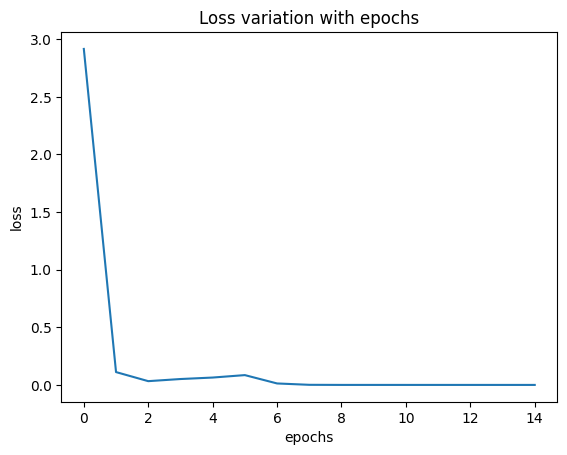

In [ ]:
plt.plot(hist_vgg19['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


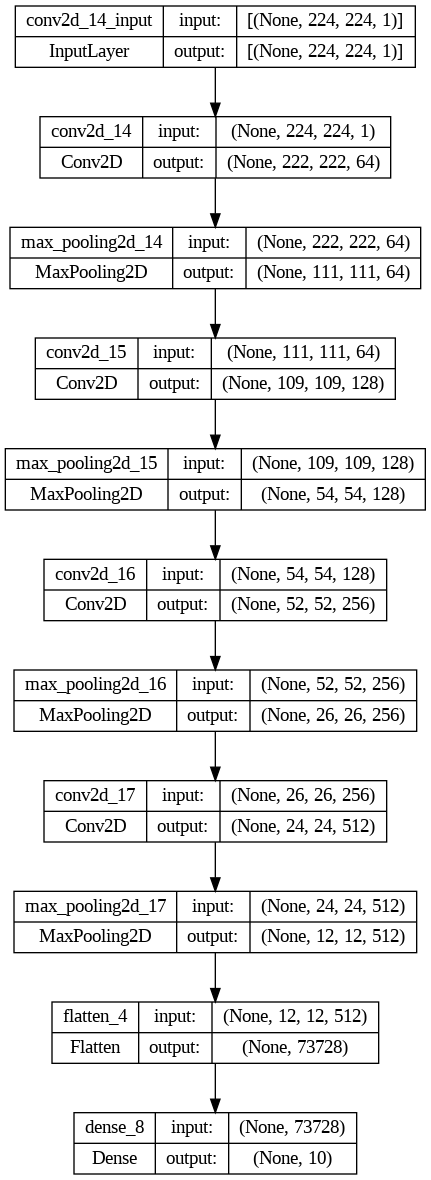

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### ResNet 50


In [ ]:
base_model=tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = x)

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds_normal,
  validation_data=val_ds_normal,
  epochs=15
)

Epoch 1/15
57/57 [==============================] - 124s 392ms/step - loss: 3.2979 - accuracy: 0.8006 - val_loss: 12159.3330 - val_accuracy: 0.1444
Epoch 2/15
57/57 [==============================] - 22s 372ms/step - loss: 1.2091 - accuracy: 0.9194 - val_loss: 370.4001 - val_accuracy: 0.1156
Epoch 3/15
57/57 [==============================] - 24s 411ms/step - loss: 0.9503 - accuracy: 0.9378 - val_loss: 84.8562 - val_accuracy: 0.2778
Epoch 4/15
57/57 [==============================] - 21s 358ms/step - loss: 0.4818 - accuracy: 0.9694 - val_loss: 41.6468 - val_accuracy: 0.4711
Epoch 5/15
57/57 [==============================] - 22s 378ms/step - loss: 0.2970 - accuracy: 0.9744 - val_loss: 1.5122 - val_accuracy: 0.9422
Epoch 6/15
57/57 [==============================] - 22s 379ms/step - loss: 0.1459 - accuracy: 0.9828 - val_loss: 1.7528 - val_accuracy: 0.8644
Epoch 7/15
57/57 [==============================] - 22s 368ms/step - loss: 0.0660 - accuracy: 0.9950 - val_loss: 3.1622 - val_accurac

In [ ]:
hist_resnet50 = pd.DataFrame(history.history)
hist_resnet50['epoch'] = history.epoch
hist_resnet50.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
10,0.117737,0.982222,6.801436,0.833333,10
11,0.629824,0.951667,112.580086,0.364444,11
12,0.209754,0.981667,0.774816,0.944444,12
13,0.282549,0.984444,6.252417,0.755556,13
14,0.093860,0.990000,0.298653,0.971111,14


Text(0.5, 1.0, 'Training accuracy variation with epochs')

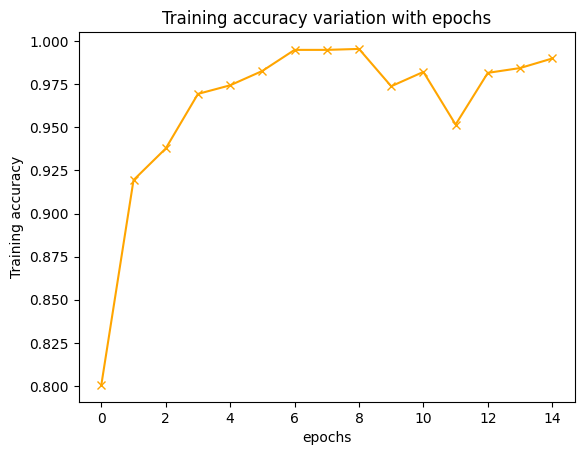

In [ ]:
plt.plot(hist_resnet50['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

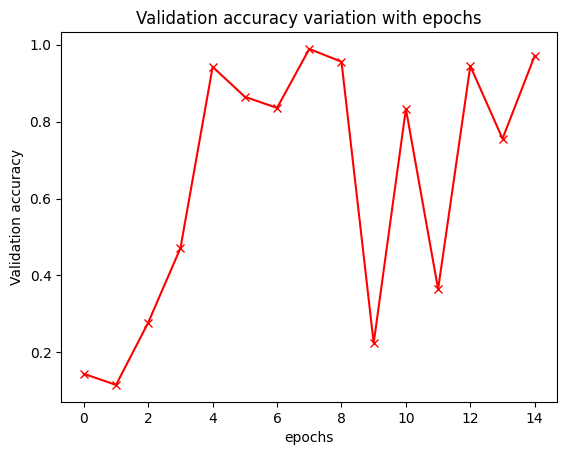

In [ ]:
plt.plot(hist_resnet50['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

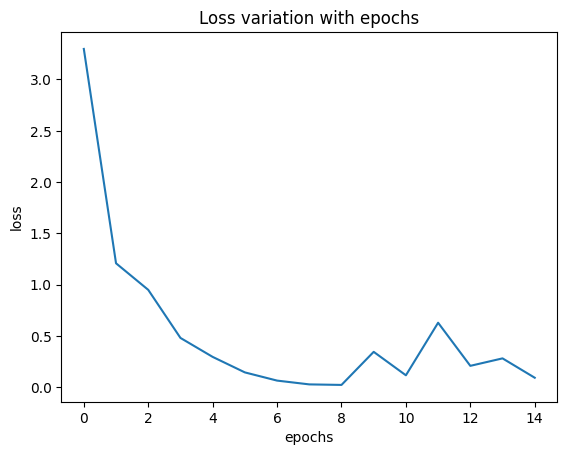

In [ ]:
plt.plot(hist_resnet50['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

### EfficientNet B3

In [ ]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=(224,224,3))

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

In [ ]:
model= Sequential()
model.add(base_model) 
model.add(MaxPooling2D())
model.add(Flatten()) 
model.add(Dense(10,activation=('softmax'))) 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 1536)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 13824)             0         
                                                                 
 dense_11 (Dense)            (None, 10)                138250    
                                                                 
Total params: 10,921,785
Trainable params: 10,834,482
Non-trainable params: 87,303
_________________________________________________________________


In [ ]:
batch_size= 32
epochs=15
learn_rate=.001


In [ ]:
sgd=tf.keras.optimizers.SGD(lr=learn_rate,momentum=.9,nesterov=False)

In [ ]:
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_normal,validation_data=val_ds_normal,epochs=15)

Epoch 1/15
57/57 [==============================] - 73s 615ms/step - loss: 1.2094 - accuracy: 0.8028 - val_loss: 1.7283 - val_accuracy: 0.8022
Epoch 2/15
57/57 [==============================] - 31s 540ms/step - loss: 0.1888 - accuracy: 0.9644 - val_loss: 0.2416 - val_accuracy: 0.9578
Epoch 3/15
57/57 [==============================] - 32s 557ms/step - loss: 0.2215 - accuracy: 0.9644 - val_loss: 0.4811 - val_accuracy: 0.9022
Epoch 4/15
57/57 [==============================] - 31s 535ms/step - loss: 0.0953 - accuracy: 0.9878 - val_loss: 0.0364 - val_accuracy: 0.9933
Epoch 5/15
57/57 [==============================] - 32s 543ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 2.5589e-04 - val_accuracy: 1.0000
Epoch 6/15
57/57 [==============================] - 32s 553ms/step - loss: 0.0509 - accuracy: 0.9922 - val_loss: 0.2645 - val_accuracy: 0.9333
Epoch 7/15
57/57 [==============================] - 31s 538ms/step - loss: 0.0041 - accuracy: 0.9983 - val_loss: 3.1533e-04 - val_accuracy

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
10,0.000740,0.999444,0.000001,1.0,10
11,0.000017,1.000000,0.000001,1.0,11
12,0.000012,1.000000,0.000001,1.0,12
13,0.000013,1.000000,0.000001,1.0,13
14,0.000185,1.000000,0.000001,1.0,14


Text(0.5, 1.0, 'Training accuracy variation with epochs')

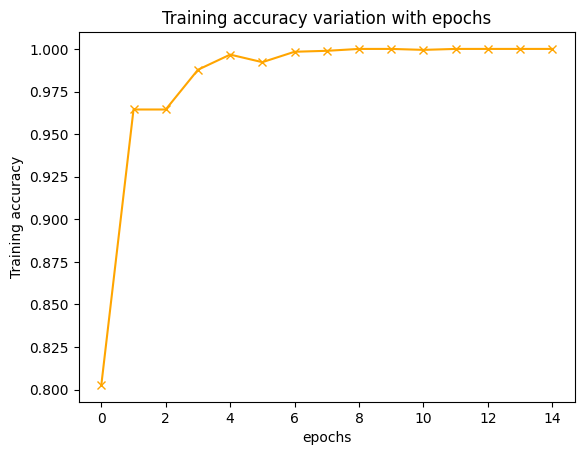

In [ ]:
plt.plot(hist['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

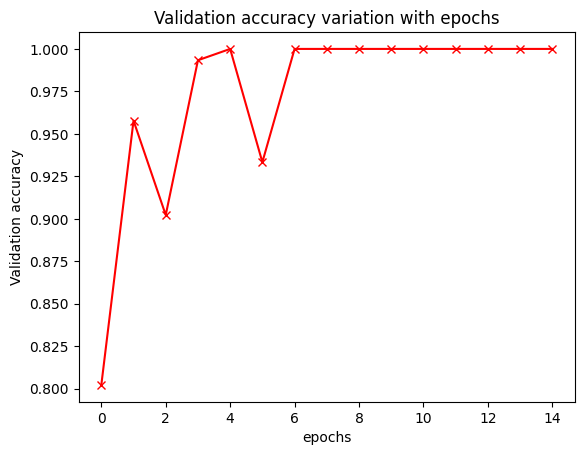

In [ ]:
plt.plot(hist['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

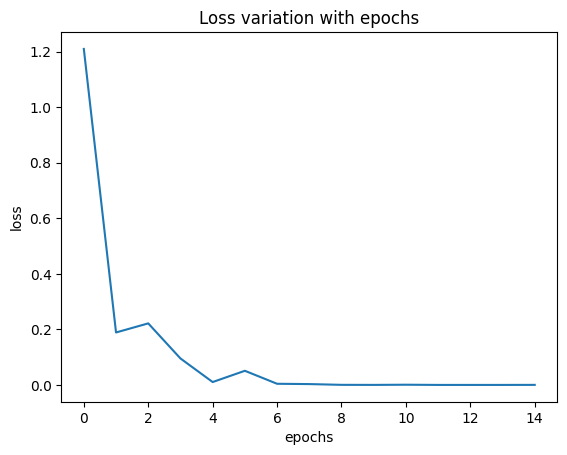

In [ ]:
plt.plot(hist['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

### Implementation present in paper: [Static Hand Gesture Recognition using Convolutional Neural Network with Data Augmentation](https://www.researchgate.net/figure/Sample-Images-from-self-developed-Dataset-Hand-Gesture-Recognition-Database-14-also_fig3_333618617)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 54, 54, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 186624)           

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.001),
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15,
)

Epoch 1/15
57/57 [==============================] - 11s 151ms/step - loss: 2.3571 - accuracy: 0.3767 - val_loss: 1.1291 - val_accuracy: 0.6089
Epoch 2/15
57/57 [==============================] - 10s 160ms/step - loss: 0.8597 - accuracy: 0.7428 - val_loss: 0.4736 - val_accuracy: 0.8800
Epoch 3/15
57/57 [==============================] - 10s 164ms/step - loss: 0.4661 - accuracy: 0.8683 - val_loss: 0.2797 - val_accuracy: 0.9156
Epoch 4/15
57/57 [==============================] - 9s 150ms/step - loss: 0.2840 - accuracy: 0.9189 - val_loss: 0.1661 - val_accuracy: 0.9578
Epoch 5/15
57/57 [==============================] - 10s 158ms/step - loss: 0.1846 - accuracy: 0.9472 - val_loss: 0.1416 - val_accuracy: 0.9644
Epoch 6/15
57/57 [==============================] - 10s 158ms/step - loss: 0.1386 - accuracy: 0.9594 - val_loss: 0.1206 - val_accuracy: 0.9600
Epoch 7/15
57/57 [==============================] - 10s 158ms/step - loss: 0.1137 - accuracy: 0.9606 - val_loss: 0.1147 - val_accuracy: 0.9622


In [ ]:
hist_cnn = pd.DataFrame(history.history)
hist_cnn['epoch'] = history.epoch
hist_cnn.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
10,0.058702,0.984444,0.089406,0.971111,10
11,0.040953,0.987222,0.088967,0.968889,11
12,0.034378,0.993333,0.093229,0.973333,12
13,0.035114,0.991111,0.090522,0.973333,13
14,0.032414,0.991667,0.082041,0.973333,14


Text(0.5, 1.0, 'Training accuracy variation with epochs')

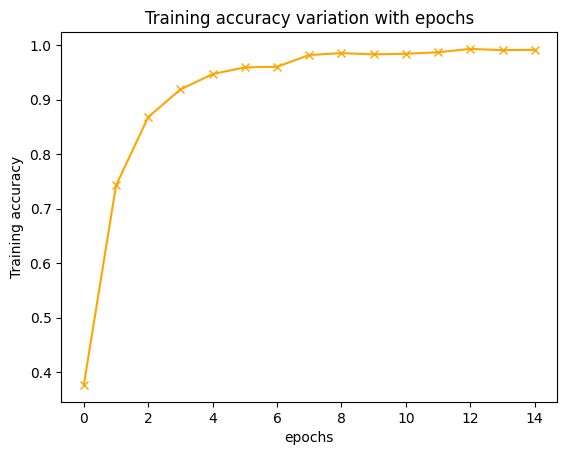

In [ ]:
plt.plot(hist_cnn['accuracy'],marker='x',color='orange')
plt.xlabel('epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy variation with epochs')

Text(0.5, 1.0, 'Validation accuracy variation with epochs')

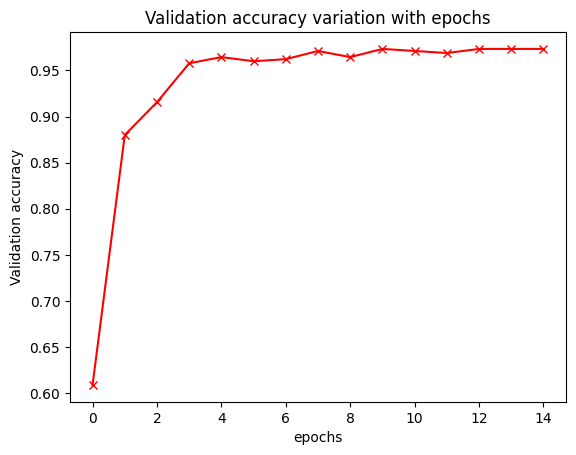

In [ ]:
plt.plot(hist_cnn['val_accuracy'],marker='x',color='red')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy variation with epochs')

Text(0.5, 1.0, 'Loss variation with epochs')

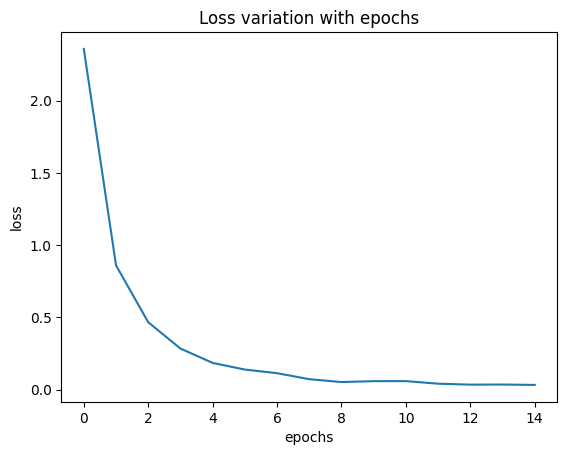

In [ ]:
plt.plot(hist_cnn['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss variation with epochs')

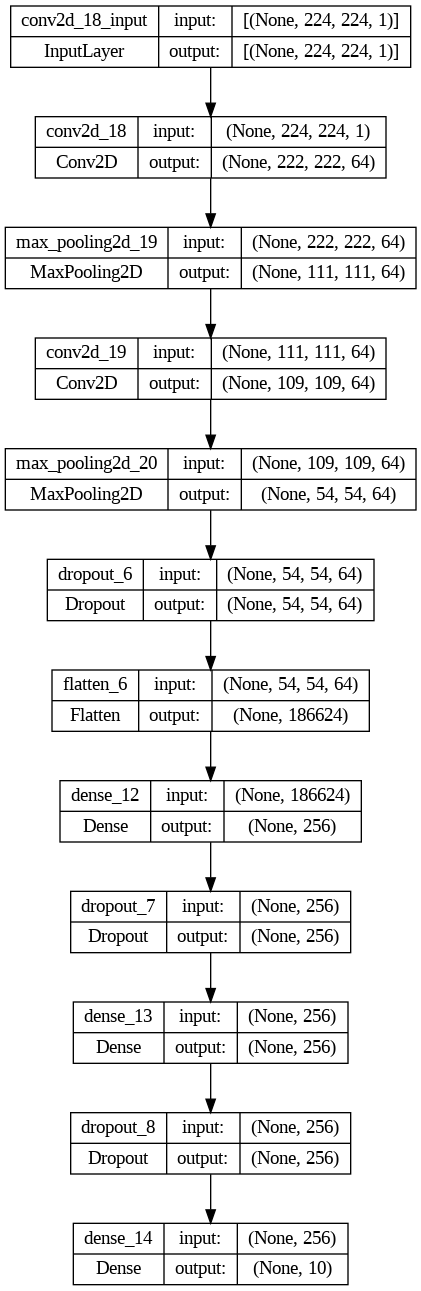

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save("cnn_.h5")

In [ ]:
model.save("model/CNN.tfl")

In [ ]:
model.save_weights("cnn/CNN_.tfl")

In [ ]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras '/content/cnn_.h5' '/content/cnn_'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-03 05:42:11.121280: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-05-03 05:42:11.121377: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-05-03 05:42:11.121395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing librar

## Comparative Analysis

In [ ]:
Accuracy_list = [0.995556, 0.971111, 1.0, 0.973333]

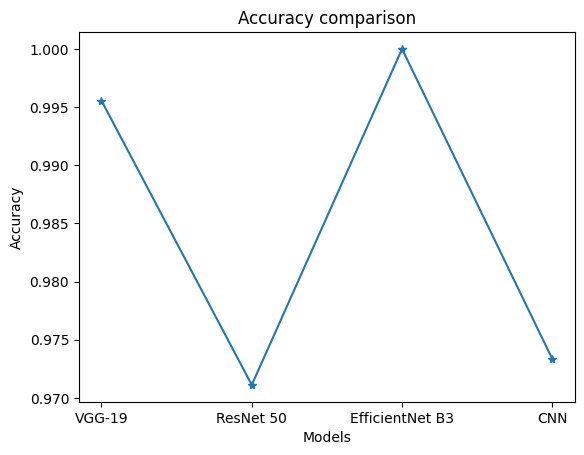

In [ ]:
Acc_models = ['VGG-19', 'ResNet 50', 'EfficientNet B3', 'CNN']
plt.plot(Acc_models, Accuracy_list, marker ='*') 
plt.title('Accuracy comparison') 
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.draw() 
plt.show()

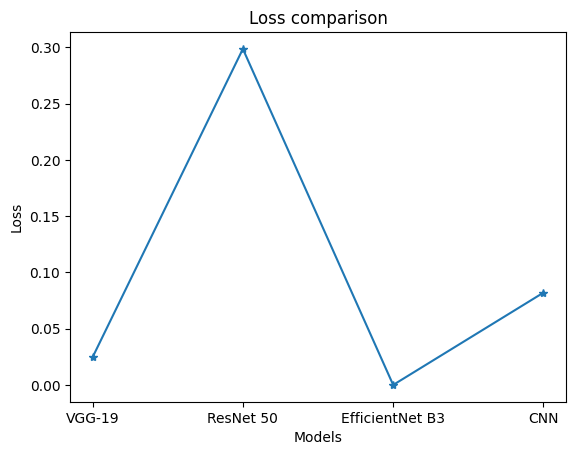

In [ ]:
losslist = [0.024584, 0.298653, 0.000001, 0.082041]
models = ['VGG-19', 'ResNet 50', 'EfficientNet B3', 'CNN']
plt.plot(models, losslist, marker ='*') 
plt.title('Loss comparison') 
plt.ylabel('Loss')
plt.xlabel('Models')
plt.draw() 
plt.show()